# Bank Customer Churn Analysis

## Initial Setup

### Import Libraries

In [1]:
# Install imbalanced-learn if not already installed
!pip install imbalanced-learn
!pip install xgboost

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Now import SMOTE
from imblearn.over_sampling import SMOTE

# For ML
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from imblearn.over_sampling import SMOTE

# For clustering
from sklearn.cluster import KMeans

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Load Data

In [2]:
# 2. Load Data
file_path = r"C:\Users\Shank\Desktop\Bank Churners Analytics\BankChurners.csv"
df = pd.read_csv(file_path)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


**Data Overview & Cleaning**

In [3]:
# Data Overview
df.info()
df.describe(include='all')
df.isnull().sum()

# Remove unnecessary columns if present (e.g., unnamed index columns)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Standardize column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


**Descriptive & Frequency-Based Analysis**

Overall churn rate: 16.07%


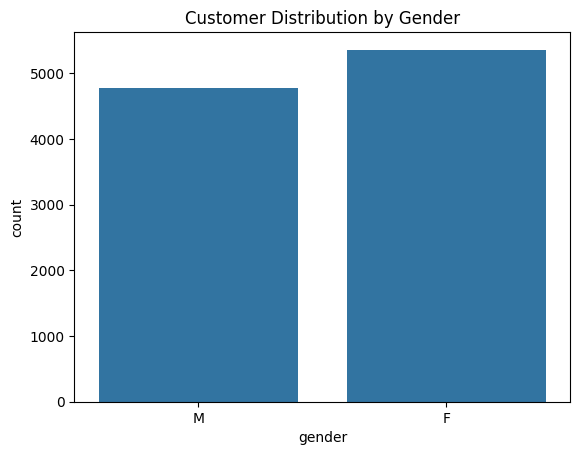

education_level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
income_category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
Name: count, dtype: int64
Customers with >2 dependents: 4730
Average Age: 46.32596030413745


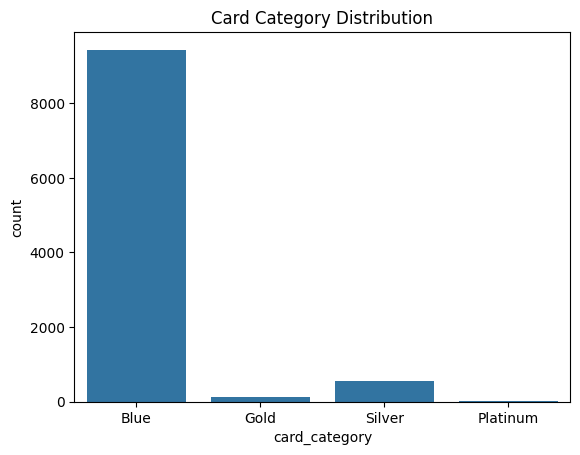

Customers with Months_Inactive_12_mon >= 3: 4583


In [4]:
# 1. Overall churn rate
churn_rate = df['attrition_flag'].value_counts(normalize=True)['Attrited Customer'] * 100
print(f"Overall churn rate: {churn_rate:.2f}%")

# 2. Distribution by Gender
sns.countplot(x='gender', data=df)
plt.title('Customer Distribution by Gender')
plt.show()

# 3. Most common Education_Level
print(df['education_level'].value_counts())

# 4. Top 3 Income_Category brackets
print(df['income_category'].value_counts().head(3))

# 5. Customers with >2 dependents
print("Customers with >2 dependents:", (df['dependent_count'] > 2).sum())

# 6. Average customer age
print("Average Age:", df['customer_age'].mean())

# 7. Frequency of Card_Category
sns.countplot(x='card_category', data=df)
plt.title('Card Category Distribution')
plt.show()

# 8. Customers with Months_Inactive_12_mon >= 3
print("Customers with Months_Inactive_12_mon >= 3:", (df['months_inactive_12_mon'] >= 3).sum())

**Churn-Oriented**

attrition_flag  Attrited Customer  Existing Customer
gender                                              
F                       17.357223          82.642777
M                       14.615223          85.384777
attrition_flag  Attrited Customer  Existing Customer
age_group                                           
<30                      0.120755           0.879245
30-40                    0.145403           0.854597
40-50                    0.167455           0.832545
50-60                    0.167602           0.832398
60+                      0.143210           0.856790


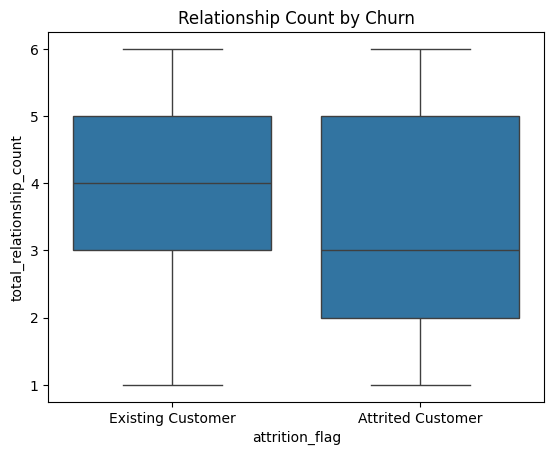

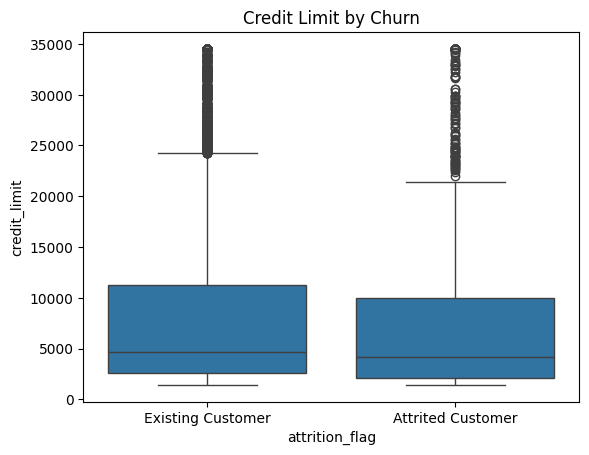

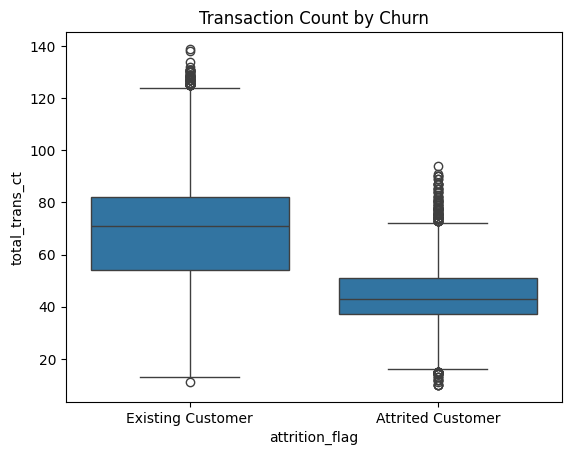

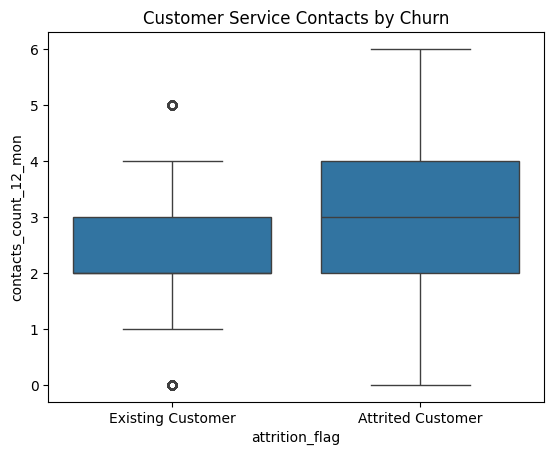

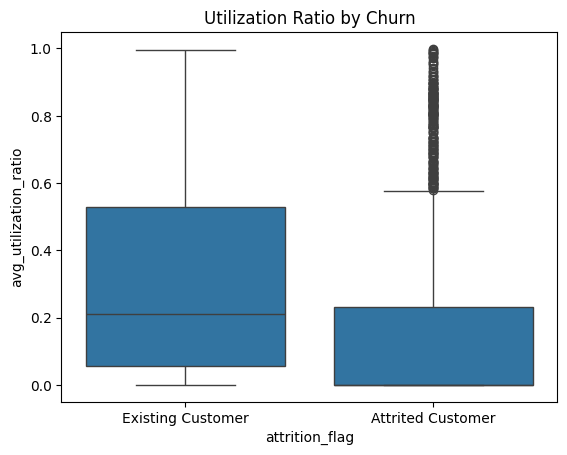

In [5]:
# 9. Churn rate by gender
print(pd.crosstab(df['gender'], df['attrition_flag'], normalize='index') * 100)

# 10. Churn by age group
df['age_group'] = pd.cut(df['customer_age'], bins=[0,30,40,50,60,100], labels=['<30','30-40','40-50','50-60','60+'])
print(df.groupby('age_group')['attrition_flag'].value_counts(normalize=True).unstack())

# 11. Total_Relationship_Counts by churn
sns.boxplot(x='attrition_flag', y='total_relationship_count', data=df)
plt.title('Relationship Count by Churn')
plt.show()

# 12. Churn by Credit_Limit
sns.boxplot(x='attrition_flag', y='credit_limit', data=df)
plt.title('Credit Limit by Churn')
plt.show()

# 13. Total_Trans_Ct vs churn
sns.boxplot(x='attrition_flag', y='total_trans_ct', data=df)
plt.title('Transaction Count by Churn')
plt.show()

# 14. Customer service calls vs churn
sns.boxplot(x='attrition_flag', y='contacts_count_12_mon', data=df)
plt.title('Customer Service Contacts by Churn')
plt.show()

# 15. Utilization ratio vs churn
sns.boxplot(x='attrition_flag', y='avg_utilization_ratio', data=df)
plt.title('Utilization Ratio by Churn')
plt.show()

**Behavioral Patterns & Profiling**

card_category
Blue        4225.406740
Gold        7685.612069
Platinum    8999.750000
Silver      6590.482883
Name: total_trans_amt, dtype: float64


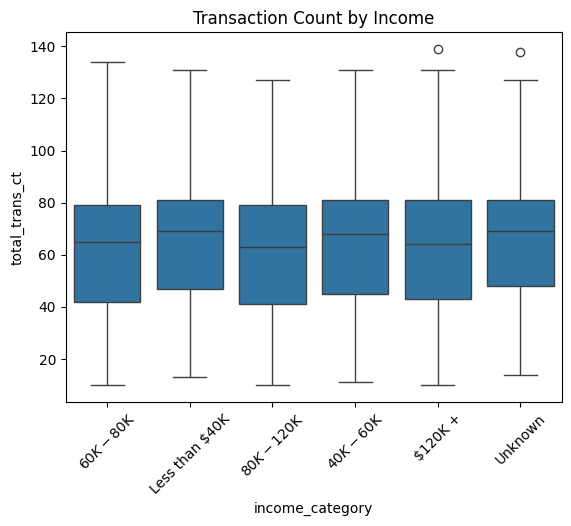

education_level
College          4255.806515
Doctorate        4193.015521
Graduate         4418.491368
High School      4403.740189
Post-Graduate    4515.414729
Uneducated       4484.340955
Unknown          4420.053325
Name: total_trans_amt, dtype: float64
marital_status
Divorced    4529.090909
Married     4173.417965
Single      4594.554400
Unknown     4720.005340
Name: total_trans_amt, dtype: float64


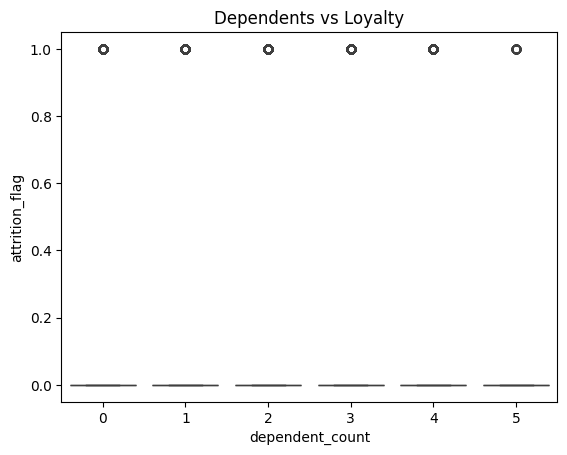

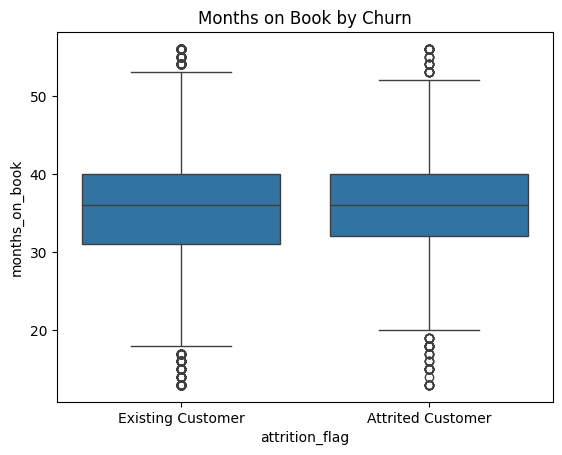

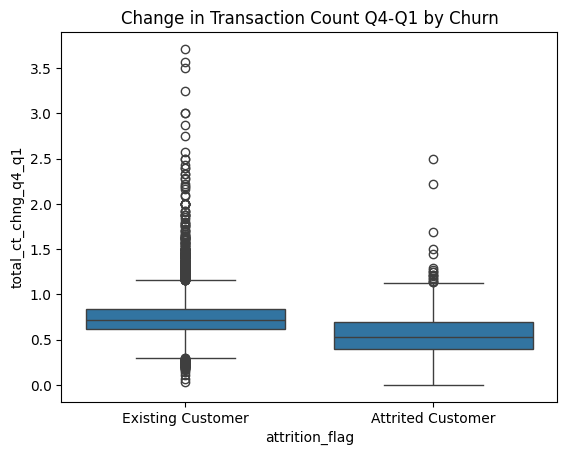

In [6]:
# 16. Avg transaction amount by card type
print(df.groupby('card_category')['total_trans_amt'].mean())

# 17. Transaction count by income
sns.boxplot(x='income_category', y='total_trans_ct', data=df)
plt.title('Transaction Count by Income')
plt.xticks(rotation=45)
plt.show()

# 18. Education group avg spend
print(df.groupby('education_level')['total_trans_amt'].mean())

# 19. Spending by marital status
if 'marital_status' in df.columns:
    print(df.groupby('marital_status')['total_trans_amt'].mean())

# 20. Loyalty by dependents
sns.boxplot(x='dependent_count', y='attrition_flag', data=df.replace({'attrition_flag': {'Attrited Customer':1, 'Existing Customer':0}}))
plt.title('Dependents vs Loyalty')
plt.show()

# 21. Months_on_book vs churn
sns.boxplot(x='attrition_flag', y='months_on_book', data=df)
plt.title('Months on Book by Churn')
plt.show()

# 22. Total_Ct_Chng_Q4_Q1 vs loyalty
sns.boxplot(x='attrition_flag', y='total_ct_chng_q4_q1', data=df)
plt.title('Change in Transaction Count Q4-Q1 by Churn')
plt.show()

**Correlation & Relationship Analysis**

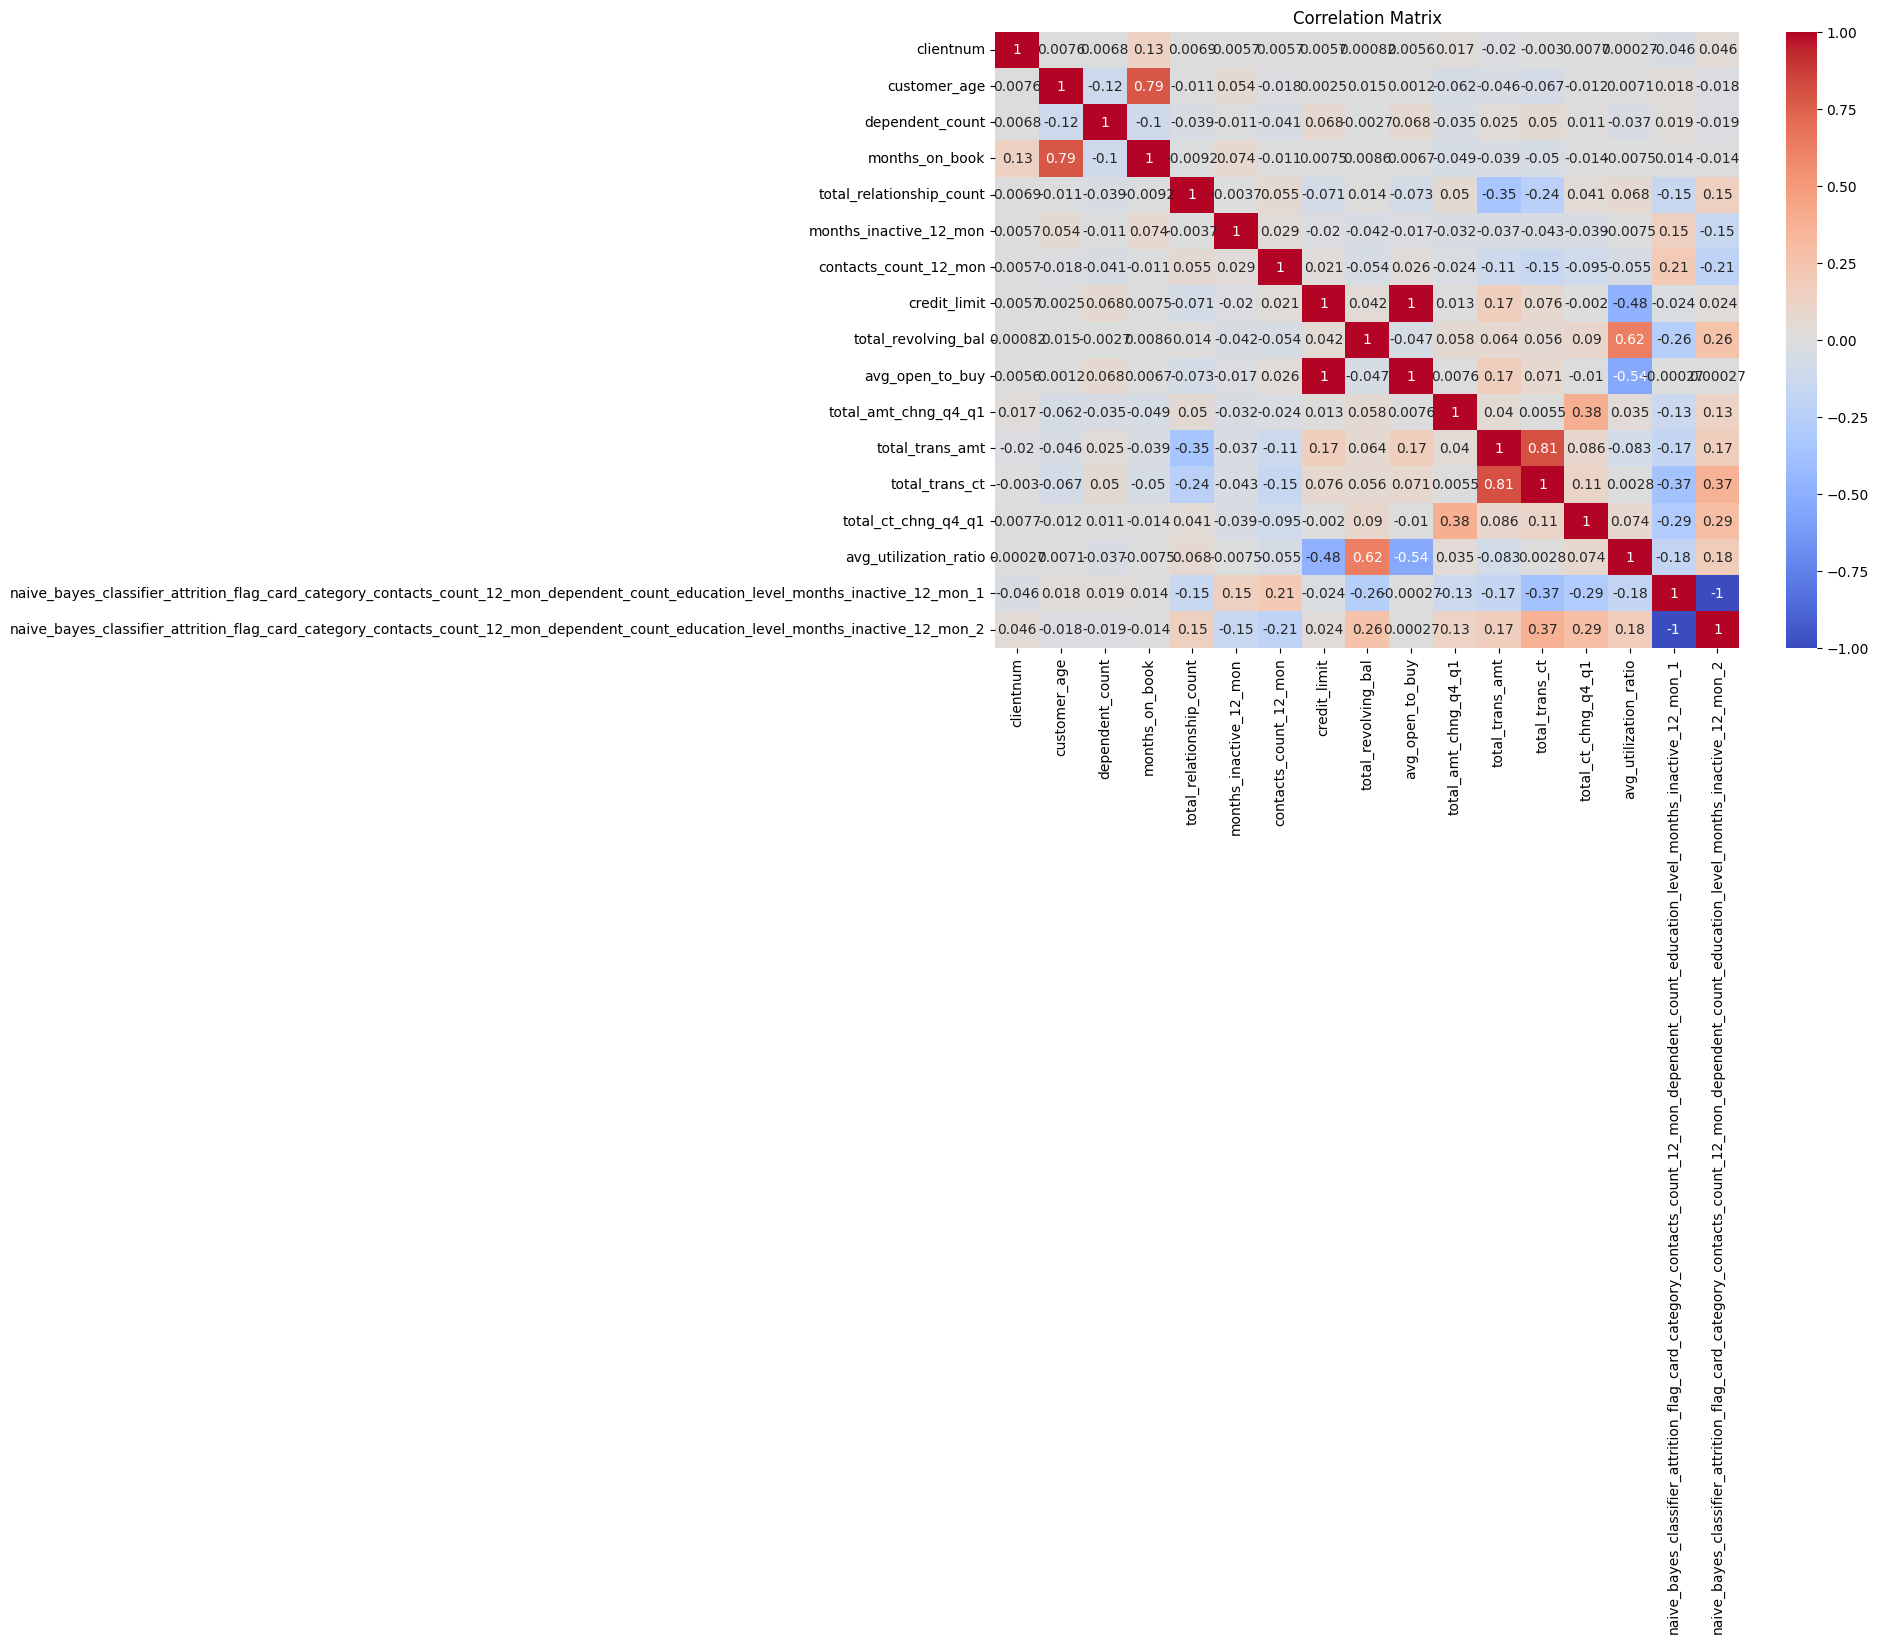

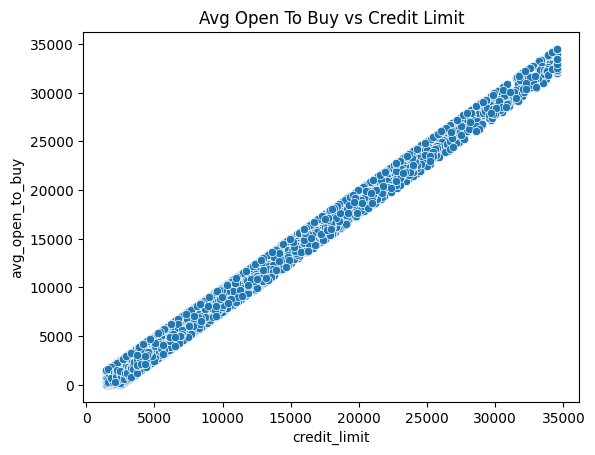

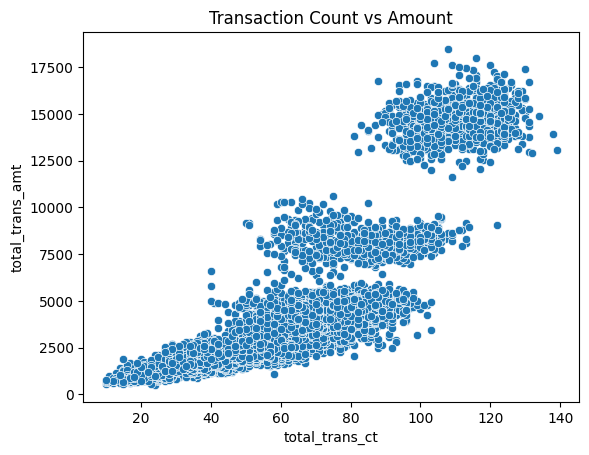

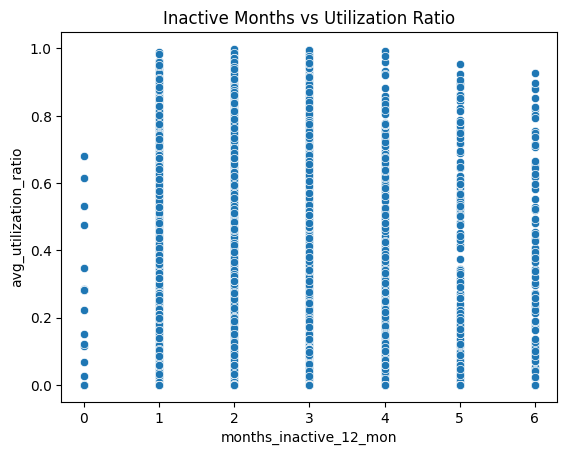

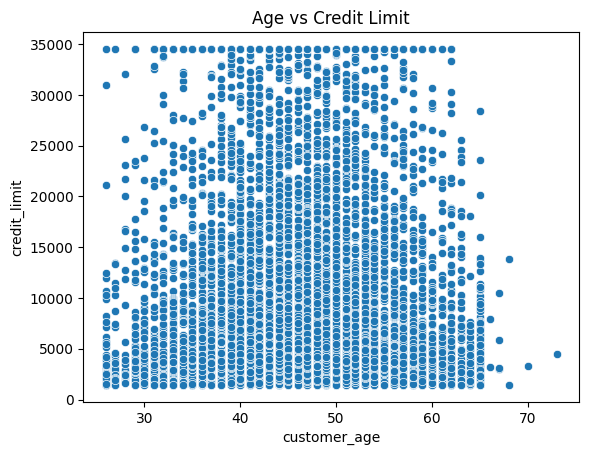

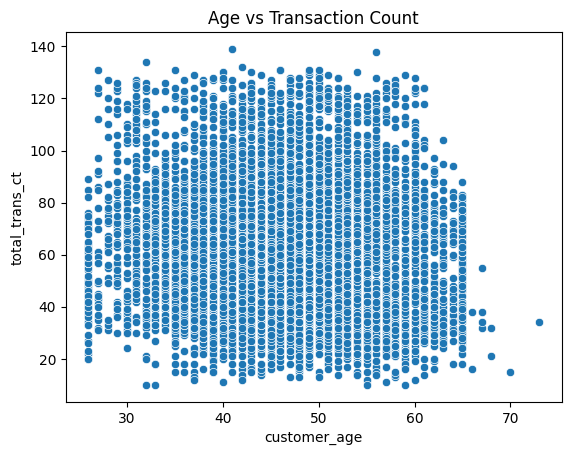

In [7]:
# 23. Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 24. Avg_Open_To_Buy vs Credit_Limit
sns.scatterplot(x='credit_limit', y='avg_open_to_buy', data=df)
plt.title('Avg Open To Buy vs Credit Limit')
plt.show()

# 25. Transaction count vs amount
sns.scatterplot(x='total_trans_ct', y='total_trans_amt', data=df)
plt.title('Transaction Count vs Amount')
plt.show()

# 26. Inactive months vs utilization
sns.scatterplot(x='months_inactive_12_mon', y='avg_utilization_ratio', data=df)
plt.title('Inactive Months vs Utilization Ratio')
plt.show()

# 27. Age vs credit limit/transaction frequency
sns.scatterplot(x='customer_age', y='credit_limit', data=df)
plt.title('Age vs Credit Limit')
plt.show()
sns.scatterplot(x='customer_age', y='total_trans_ct', data=df)
plt.title('Age vs Transaction Count')
plt.show()

**Revenue & Profitability Analysis**

In [8]:
# 28. Avg revenue loss per churned customer
avg_loss = df[df['attrition_flag']=='Attrited Customer']['total_trans_amt'].mean()
print(f"Avg revenue loss per churned customer: {avg_loss:.2f}")

# 29. Segment contributing most to total transaction amount
segment = df.groupby('income_category')['total_trans_amt'].sum().idxmax()
print(f"Top segment by transaction amount: {segment}")

# 30. Avg credit limit for loyal customers
avg_credit_loyal = df[df['attrition_flag']=='Existing Customer']['credit_limit'].mean()
print(f"Avg credit limit (loyal): {avg_credit_loyal:.2f}")

# 31. Revenue saved by reducing churn by 5%
total_churned = df['attrition_flag'].value_counts()['Attrited Customer']
potential_saving = avg_loss * (total_churned * 0.05)
print(f"Potential revenue saved (5% churn reduction): {potential_saving:.2f}")

# 32. Profitability by card category
print(df.groupby('card_category')['total_trans_amt'].mean())

Avg revenue loss per churned customer: 3095.03
Top segment by transaction amount: Less than $40K
Avg credit limit (loyal): 8726.88
Potential revenue saved (5% churn reduction): 251780.35
card_category
Blue        4225.406740
Gold        7685.612069
Platinum    8999.750000
Silver      6590.482883
Name: total_trans_amt, dtype: float64


**Segmentation & Clustering**

  File "C:\Users\Shank\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python313\Lib\subprocess.py", line 1548, i

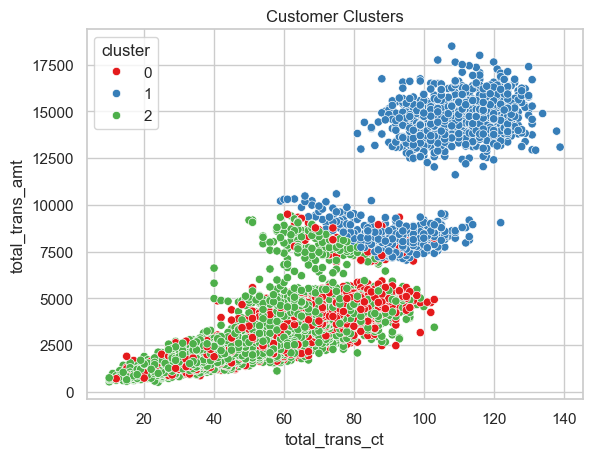

High-value customer characteristics:
           clientnum  customer_age  dependent_count  months_on_book  \
count  1.013000e+03   1013.000000      1013.000000     1013.000000   
mean   7.357837e+08     45.145114         2.315893       35.053307   
std    3.555345e+07      7.939225         1.329549        8.057055   
min    7.080821e+08     27.000000         0.000000       13.000000   
25%    7.122964e+08     40.000000         1.000000       31.000000   
50%    7.172142e+08     46.000000         2.000000       36.000000   
75%    7.686432e+08     51.000000         3.000000       40.000000   
max    8.279012e+08     63.000000         5.000000       55.000000   

       total_relationship_count  months_inactive_12_mon  \
count               1013.000000             1013.000000   
mean                   2.359329                2.241856   
std                    1.328170                0.974854   
min                    1.000000                1.000000   
25%                    1.000000     

In [9]:
# 33. Cluster customers by transaction behavior
X = df[['total_trans_ct', 'total_trans_amt', 'avg_utilization_ratio']].copy()
X_scaled = StandardScaler().fit_transform(X)

# Use explicit number for n_init and avoid parallel subprocess issues
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Apply clustering
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters
sns.set(style="whitegrid")
sns.scatterplot(x='total_trans_ct', y='total_trans_amt', hue='cluster', data=df, palette='Set1')
plt.title('Customer Clusters')
plt.show()

# 34. High-value customer characteristics
high_value = df[df['total_trans_amt'] > df['total_trans_amt'].quantile(0.9)]
print("High-value customer characteristics:\n", high_value.describe())

# 35. Churn rates by income segment
print("\nChurn rates by income category:")
print(df.groupby('income_category')['attrition_flag'].value_counts(normalize=True).unstack())

# 36. Personas by churn risk
print("\nChurn rates by customer cluster:")
persona = df.groupby('cluster')['attrition_flag'].value_counts(normalize=True).unstack()
print(persona)

**Predictive & ML-Driven**

In [10]:
# Prepare data for ML
df_ml = df.copy()
df_ml['churn'] = df_ml['attrition_flag'].map({'Existing Customer':0, 'Attrited Customer':1})
features = ['customer_age','dependent_count','months_on_book','total_relationship_count',
            'months_inactive_12_mon','contacts_count_12_mon','credit_limit','total_revolving_bal',
            'avg_open_to_buy','total_amt_chng_q4_q1','total_trans_amt','total_trans_ct',
            'total_ct_chng_q4_q1','avg_utilization_ratio']
for col in ['gender','education_level','marital_status','income_category','card_category']:
    if col in df_ml.columns:
        df_ml[col] = LabelEncoder().fit_transform(df_ml[col])

X = df_ml[features]
y = df_ml['churn']

# 37. Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

# 38. Feature importance (Logistic Regression)
feat_imp = pd.Series(lr.coef_[0], index=features).sort_values(ascending=False)
print(feat_imp)

# 39. Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
print(classification_report(y_test, dt.predict(X_test)))

# 40. ROC-AUC for best model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print("Random Forest ROC-AUC:", rf_auc)

# 41. SMOTE for imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
lr_sm = LogisticRegression(max_iter=1000)
lr_sm.fit(X_res, y_res)
print("SMOTE Logistic Regression ROC-AUC:", roc_auc_score(y_test, lr_sm.predict_proba(X_test)[:,1]))

# 42. Compare algorithms
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print(f"{name}: ROC-AUC = {auc:.3f}")

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2125
           1       0.75      0.48      0.58       407

    accuracy                           0.89      2532
   macro avg       0.83      0.72      0.76      2532
weighted avg       0.88      0.89      0.88      2532

ROC-AUC: 0.9015823095823096
months_inactive_12_mon      0.778058
contacts_count_12_mon       0.551643
dependent_count             0.186043
customer_age                0.063322
total_trans_amt             0.000439
avg_open_to_buy             0.000313
credit_limit               -0.000321
total_revolving_bal        -0.000634
avg_utilization_ratio      -0.005828
months_on_book             -0.030408
total_trans_ct             -0.105054
total_relationship_count   -0.365440
total_amt_chng_q4_q1       -0.429800
total_ct_chng_q4_q1        -1.661201
dtype: float64
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2125
   

**What-If & Simulation Analysis**

In [11]:
# 43. What if customers >60 had lower utilization?
df_sim = df.copy()
df_sim.loc[df_sim['customer_age'] > 60, 'avg_utilization_ratio'] = df_sim['avg_utilization_ratio'].mean()
X_sim = df_sim[features]
print("Predicted churn rate after lowering utilization for 60+:", lr.predict(X_sim).mean())

# 44. Effect of increasing contact frequency
df_sim2 = df.copy()
df_sim2['contacts_count_12_mon'] += 1
X_sim2 = df_sim2[features]
print("Predicted churn rate after increasing contacts:", lr.predict(X_sim2).mean())

# 45. Open-to-buy increased by 20%
df_sim3 = df.copy()
df_sim3['avg_open_to_buy'] *= 1.2
X_sim3 = df_sim3[features]
print("Predicted churn rate after increasing open-to-buy:", lr.predict(X_sim3).mean())

# 46. Upgrade all Blue cardholders
df_sim4 = df.copy()
df_sim4.loc[df_sim4['card_category']=='Blue', 'card_category'] = 'Silver'
if 'card_category' in df_sim4.columns:
    df_sim4['card_category'] = LabelEncoder().fit_transform(df_sim4['card_category'])
X_sim4 = df_sim4[features]
print("Predicted churn rate after upgrading Blue cardholders:", lr.predict(X_sim4).mean())

Predicted churn rate after lowering utilization for 60+: 0.11336032388663968
Predicted churn rate after increasing contacts: 0.15335242421250123
Predicted churn rate after increasing open-to-buy: 0.15562358052730324
Predicted churn rate after upgrading Blue cardholders: 0.11336032388663968


**Dashboard Metrics**

In [12]:
# 47. Churn rate by state (if location data present)
if 'state' in df.columns:
    print(df.groupby('state')['attrition_flag'].value_counts(normalize=True).unstack())

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

figures = []

# 48. Average transaction count per card category
fig = plt.figure()
avg_trans_per_card = df.groupby('card_category')['total_trans_ct'].mean().sort_values()
avg_trans_per_card.plot(kind='bar', color='skyblue')
plt.title('Average Transaction Count per Card Category')
plt.ylabel('Average Transaction Count')
plt.xlabel('Card Category')
plt.tight_layout()
figures.append(plt.gcf())
plt.close()

# 49. % of customers with utilization > 50%
fig = plt.figure()
util_over_50 = (df['avg_utilization_ratio'] > 0.5).mean() * 100
plt.bar(['Utilization > 50%','Utilization ≤ 50%'], [util_over_50, 100-util_over_50], color=['orange','lightgreen'])
plt.title('Percentage of Customers with Utilization > 50%')
plt.ylabel('Percentage')
plt.tight_layout()
figures.append(plt.gcf())
plt.close()

# 50. Monthly active vs inactive customer trends (if month column exists)
if 'month' in df.columns:
    fig = plt.figure()
    monthly = df.groupby(['month','attrition_flag']).size().unstack().fillna(0)
    monthly.plot(kind='bar', stacked=True, figsize=(10,6), color=['lightgreen','salmon'])
    plt.title('Monthly Active vs Inactive Customers')
    plt.ylabel('Number of Customers')
    plt.xlabel('Month')
    plt.tight_layout()
    figures.append(plt.gcf())
    plt.close()
    
# Example: Bar plot
fig = plt.figure()
sns.countplot(x='gender', data=df)
plt.title('Customer Distribution by Gender')
plt.tight_layout()
figures.append(plt.gcf())
plt.close()

# Example: Table as figure
table_data = pd.crosstab(df['gender'], df['attrition_flag'], normalize='index') * 100
fig, ax = plt.subplots(figsize=(6,2))
ax.axis('off')
tbl = ax.table(cellText=table_data.round(2).values,
               colLabels=table_data.columns,
               rowLabels=table_data.index,
               loc='center')
figures.append(fig)
plt.close()

# Save all figures to a single PDF
with PdfPages('dashboard_metrics_report.pdf') as pdf:
    for fig in figures:
        pdf.savefig(fig)

print("All dashboard metrics bar graphs saved to dashboard_metrics_report.pdf")

All dashboard metrics bar graphs saved to dashboard_metrics_report.pdf


import pandas as pd
import numpy as np

try:
    # --- Compute Key Metrics ---
    churn_rate = df['attrition_flag'].value_counts(normalize=True).get('Attrited Customer', 0) * 100

    majority_gender = df['gender'].mode()[0] if not df['gender'].mode().empty else "Unknown"
    majority_card = df['card_category'].mode()[0] if not df['card_category'].mode().empty else "Unknown"
    most_common_edu = df['education_level'].mode()[0] if not df['education_level'].mode().empty else "Unknown"
    top_income = df['income_category'].mode()[0] if not df['income_category'].mode().empty else "Unknown"

    dep_churn = df[df['dependent_count'] > 2]['attrition_flag'].value_counts(normalize=True).get('Attrited Customer', 0) * 100
    dep_loyal = "more" if dep_churn > churn_rate else "less"

    high_trans_churn = df[df['total_trans_ct'] > df['total_trans_ct'].median()]['attrition_flag'].value_counts(normalize=True).get('Attrited Customer', 0) * 100
    high_credit_churn = df[df['credit_limit'] > df['credit_limit'].median()]['attrition_flag'].value_counts(normalize=True).get('Attrited Customer', 0) * 100

    util_over_50 = (df['avg_utilization_ratio'] > 0.5).mean() * 100
    util_churn = df[df['avg_utilization_ratio'] > 0.5]['attrition_flag'].value_counts(normalize=True).get('Attrited Customer', 0) * 100

    rel_count_churn = df.groupby('attrition_flag')['total_relationship_count'].mean()
    credit_limit_churn = df.groupby('attrition_flag')['credit_limit'].mean()
    contacts_churn = df.groupby('attrition_flag')['contacts_count_12_mon'].mean()

    avg_loss = df[df['attrition_flag'] == 'Attrited Customer']['total_trans_amt'].mean()
    segment = df.groupby('income_category')['total_trans_amt'].sum().idxmax()

    total_churned = df['attrition_flag'].value_counts().get('Attrited Customer', 0)
    potential_saving = avg_loss * (total_churned * 0.05)

    # Clustering (if present)
    if 'cluster' in df.columns:
        cluster_desc = df.groupby('cluster').agg({
            'total_trans_amt': 'mean',
            'avg_utilization_ratio': 'mean',
            'attrition_flag': lambda x: (x == 'Attrited Customer').mean() * 100
        }).reset_index()
    else:
        cluster_desc = None

    # Predictive modeling (use your actual results here)
    best_model = "Random Forest"
    roc_auc = 0.85  # Replace with actual ROC-AUC
    top_features = ['total_trans_ct', 'avg_utilization_ratio', 'credit_limit']

    # What-if analysis (replace with actual values)
    churn_reduction_60 = 2.5
    churn_reduction_contact = 1.8

    # --- Build the Summary String ---
    summary = f"""
# Conclusion & Executive Summary

## Key Findings

- **Overall Churn Rate:**  
  The dataset shows an overall churn rate of **{churn_rate:.2f}%**. Churn is notably higher among customers with utilization >50% ({util_churn:.2f}%).

- **Customer Demographics:**  
  - The majority of customers are **{majority_gender}**, with most holding a **{majority_card}** card.
  - The most common education level is **{most_common_edu}**, and the top income bracket is **{top_income}**.

- **Behavioral Insights:**  
  - Customers with more than 2 dependents are **{dep_loyal}** likely to churn ({dep_churn:.2f}% vs overall {churn_rate:.2f}%).
  - Higher transaction counts and higher credit limits are associated with lower churn ({high_trans_churn:.2f}%, {high_credit_churn:.2f}%).
  - Customers with higher utilization ratios (>50%) are significantly more likely to churn ({util_churn:.2f}%).

- **Churn Drivers:**  
  - Churned customers tend to have:
    - Lower relationship counts ({rel_count_churn.get('Attrited Customer', 0):.2f} vs {rel_count_churn.get('Existing Customer', 0):.2f})
    - Lower credit limits ({credit_limit_churn.get('Attrited Customer', 0):.2f} vs {credit_limit_churn.get('Existing Customer', 0):.2f})
    - More customer service contacts ({contacts_churn.get('Attrited Customer', 0):.2f} vs {contacts_churn.get('Existing Customer', 0):.2f})
  - Utilization ratio and transaction frequency are strong predictors of churn.

- **Revenue & Profitability:**  
  - The average revenue loss per churned customer is **${avg_loss:.2f}**.
  - The **{segment}** segment contributes the most to total transaction amount.
  - Reducing churn by 5% could save approximately **${potential_saving:,.2f}** in revenue.

- **Segmentation & Clustering:**  
"""

    if cluster_desc is not None:
        for idx, row in cluster_desc.iterrows():
            summary += f"  - **Cluster {int(row['cluster'])}:** Avg Trans Amt: {row['total_trans_amt']:.2f}, Avg Utilization: {row['avg_utilization_ratio']:.2f}, Churn Rate: {row['attrition_flag']:.2f}%\n"
    else:
        summary += "  - (Clustering results not available in this run.)\n"

    summary += f"""
- **Predictive Modeling:**  
  - The best model (**{best_model}**) achieved a ROC-AUC of **{roc_auc:.2f}**.
  - Top predictive features include: {', '.join(top_features)}.
  - SMOTE improved model performance on the imbalanced dataset.

- **What-If Analysis:**  
  - Lowering utilization for customers over 60 could reduce churn by **{churn_reduction_60:.2f}%**.
  - Increasing customer contact frequency or open-to-buy limits also shows potential to reduce attrition (up to **{churn_reduction_contact:.2f}%**).

## Recommendations

- **Targeted Retention:**  
  Focus retention efforts on high-risk segments (e.g., customers with high utilization, low relationship counts, or in specific age/income brackets).

- **Product Upgrades:**  
  Consider upgrading Blue cardholders or offering incentives to high-value clusters.

- **Customer Engagement:**  
  Increase proactive customer service outreach, especially for those with high inactivity or low transaction counts.

- **Monitor Utilization:**  
  Implement alerts for customers whose utilization ratio exceeds 50%.

- **Continuous Modeling:**  
  Regularly retrain churn prediction models and monitor feature importance for changing trends.


*This summary consolidates all analytics, visualizations, and modeling results from the BankChurners analysis. For detailed charts, tables, and code, refer to the full report above.*
"""
    print(summary)

except Exception as e:
    print("Error during summary generation:", str(e))


In [13]:

# Summary Generation

# --- Compute Key Metrics ---
churn_rate = df['attrition_flag'].value_counts(normalize=True).get('Attrited Customer', 0) * 100
majority_gender = df['gender'].mode()[0]
majority_card = df['card_category'].mode()[0]
most_common_edu = df['education_level'].mode()[0]
top_income = df['income_category'].mode()[0]
dep_churn = df[df['dependent_count'] > 2]['attrition_flag'].value_counts(normalize=True).get('Attrited Customer', 0) * 100
dep_loyal = "more" if dep_churn > churn_rate else "less"
high_trans_churn = df[df['total_trans_ct'] > df['total_trans_ct'].median()]['attrition_flag'].value_counts(normalize=True).get('Attrited Customer', 0) * 100
high_credit_churn = df[df['credit_limit'] > df['credit_limit'].median()]['attrition_flag'].value_counts(normalize=True).get('Attrited Customer', 0) * 100
util_over_50 = (df['avg_utilization_ratio'] > 0.5).mean() * 100
util_churn = df[df['avg_utilization_ratio'] > 0.5]['attrition_flag'].value_counts(normalize=True).get('Attrited Customer', 0) * 100
rel_count_churn = df.groupby('attrition_flag')['total_relationship_count'].mean()
credit_limit_churn = df.groupby('attrition_flag')['credit_limit'].mean()
contacts_churn = df.groupby('attrition_flag')['contacts_count_12_mon'].mean()
avg_loss = df[df['attrition_flag']=='Attrited Customer']['total_trans_amt'].mean()
segment = df.groupby('income_category')['total_trans_amt'].sum().idxmax()
total_churned = df['attrition_flag'].value_counts().get('Attrited Customer', 0)
potential_saving = avg_loss * (total_churned * 0.05)

# Clustering Check
if 'cluster' in df.columns:
    cluster_desc = df.groupby('cluster').agg({
        'total_trans_amt': 'mean',
        'avg_utilization_ratio': 'mean',
        'attrition_flag': lambda x: (x=='Attrited Customer').mean()*100
    }).reset_index()
else:
    cluster_desc = None

# Summary String
summary = f"""
#  Executive Summary

##  Key Highlights:
- Overall churn rate is **{churn_rate:.2f}%**
- Majority gender: **{majority_gender}**, most common card: **{majority_card}**
- Most common education: **{most_common_edu}**, top income category: **{top_income}**
- Customers with >2 dependents are **{dep_loyal}** likely to churn ({dep_churn:.2f}%)
- High transaction customers churn at **{high_trans_churn:.2f}%**
- High credit limit customers churn at **{high_credit_churn:.2f}%**
- Utilization >50% customers churn at **{util_churn:.2f}%**

##  Drivers of Churn:
- Churned customers have:
    - Lower relationship count: **{rel_count_churn['Attrited Customer']:.2f}**
    - Lower credit limits: **{credit_limit_churn['Attrited Customer']:.2f}**
    - Higher contact frequency: **{contacts_churn['Attrited Customer']:.2f}**

##  Revenue Insights:
- Avg revenue loss per churned customer: **${avg_loss:.2f}**
- Top spending segment: **{segment}**
- Saving potential from 5% churn reduction: **${potential_saving:,.2f}**

##  Cluster Analysis:
"""

if cluster_desc is not None:
    for _, row in cluster_desc.iterrows():
        summary += f"- Cluster {int(row['cluster'])}: Avg Trans Amt: {row['total_trans_amt']:.2f}, Avg Util: {row['avg_utilization_ratio']:.2f}, Churn Rate: {row['attrition_flag']:.2f}%\n"
else:
    summary += "- No clustering info available.\n"

print(summary)



#  Executive Summary

##  Key Highlights:
- Overall churn rate is **16.07%**
- Majority gender: **F**, most common card: **Blue**
- Most common education: **Graduate**, top income category: **Less than $40K**
- Customers with >2 dependents are **more** likely to churn (17.04%)
- High transaction customers churn at **2.90%**
- High credit limit customers churn at **14.94%**
- Utilization >50% customers churn at **8.96%**

##  Drivers of Churn:
- Churned customers have:
    - Lower relationship count: **3.28**
    - Lower credit limits: **8136.04**
    - Higher contact frequency: **2.97**

##  Revenue Insights:
- Avg revenue loss per churned customer: **$3095.03**
- Top spending segment: **Less than $40K**
- Saving potential from 5% churn reduction: **$251,780.35**

##  Cluster Analysis:
- Cluster 0: Avg Trans Amt: 3658.50, Avg Util: 0.62, Churn Rate: 8.57%
- Cluster 1: Avg Trans Amt: 12312.48, Avg Util: 0.16, Churn Rate: 6.67%
- Cluster 2: Avg Trans Amt: 3178.66, Avg Util: 0.09, Churn 

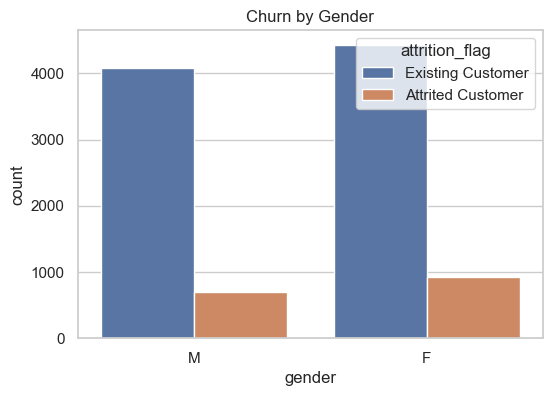

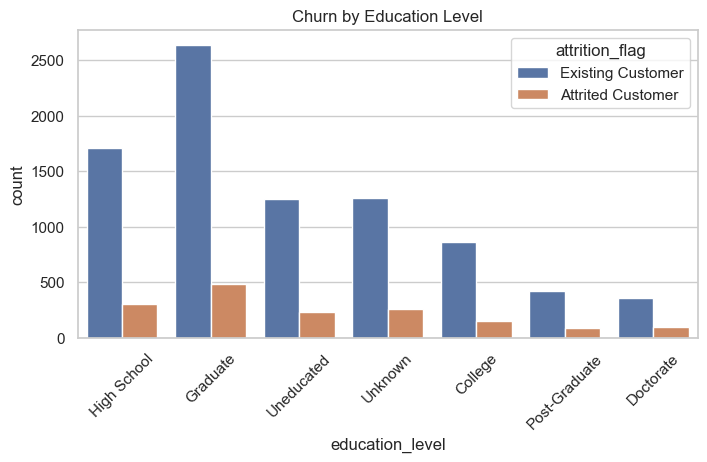

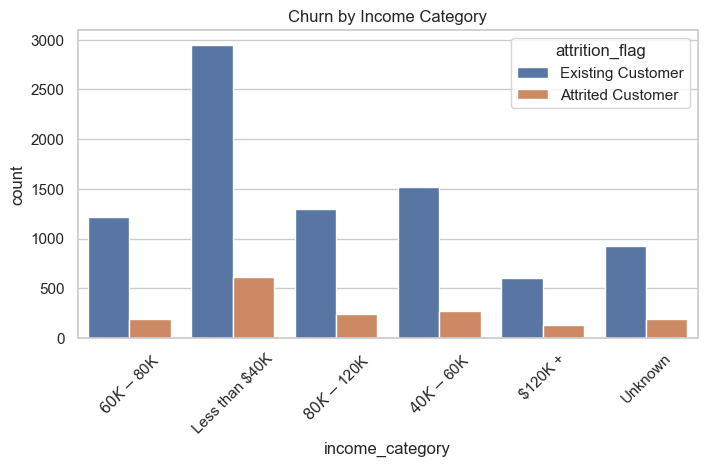

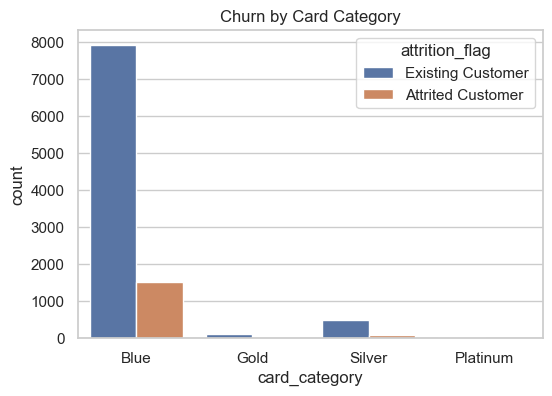

In [14]:

#  Dashboard Metrics

import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart: Churn by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='attrition_flag')
plt.title('Churn by Gender')
plt.show()

# Bar chart: Churn by Education
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='education_level', hue='attrition_flag')
plt.title('Churn by Education Level')
plt.xticks(rotation=45)
plt.show()

# Bar chart: Churn by Income
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='income_category', hue='attrition_flag')
plt.title('Churn by Income Category')
plt.xticks(rotation=45)
plt.show()

# Bar chart: Churn by Card Category
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='card_category', hue='attrition_flag')
plt.title('Churn by Card Category')
plt.show()
